# Random Walk with Gaussian distributed steps #
Study of the 1D random walk with gaussian distributed step lengths.
The distribution is given by $f(s)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(s-l)^2}{2\sigma^2}}$, where $l$ is the mean displacement and $\sigma$ the standard deviation (which squares to be the variance) of the Normal distribution.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

## Ensemble of Gaussian paths ##
The algorithm below generates an ensemble of $M$ paths of length $N$. To get the Gaussian/Normal distributed steps, we could implement an algorithm as discussed in class for the Maxwell-Boltzmann velocity distribution, *or* we can let an existing python library do the heavy lifting. 

Here we make use of the *numpy library*, which provides a random generator for the normal distribution: **[numpy.random.normal(loc,scale,size)](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)**. The loc and scale parameters are respectively the mean and standard deviation of our normal distribution. Size is a [tuple](https://www.w3schools.com/python/python_tuples.asp) (*i.e.,* a python object listing an ordered series of objects between round brackets) defining the array dimensions of the list of random numbers we want returned. We just want a list of length $M$ hence **size=(M)**. If we wanted a 2D array of $N \times M$, then we should use **size=(n,M)**.

Once the ensemble of paths is generated, we can calculate the average and standard deviation. One could do this at each **step**, however, again relying on *numpy* for the heavy lifting, we make use of the **[numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)** and **[numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)** functions to calculate all averages and standard deviations in a *single line of code*. Notice the **axis** parameter. This is used to tell numpy how the average and standard deviatioin should be calculated in our multidimensional dataset. As we want to take the average over all particles (row index), we set **axis=0** which is the *first index*, remembering Python starts counting at *zero*. If we want the average position of each individual particle over its entire path, we simply set **axis=1**.

##### NOTES #####
 - The implementation stores all paths for later visualisation, so be carefull when increasing the number of steps and ensemble size.
 - We are using numpy as library for the heavy lifting, but there exists other libraries (specifically aimed at statistics) which are also suitable for this task.

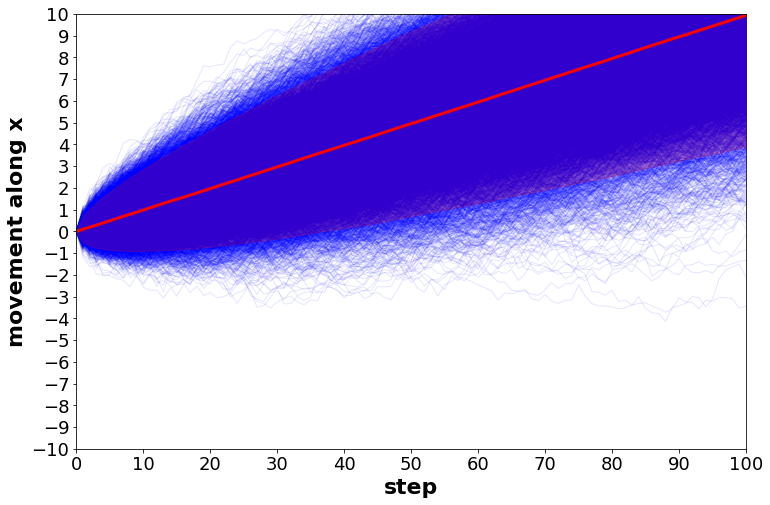

In [63]:
# 1. Initialisation
N=100     # Number of steps to take.
M=10000      # Number of particles in our ensemble.
l=0.1     # The mean displacement of the normal distribution.
sig=0.3   # The standard deviation of the normal distribution.
Xcoord=np.array([i for i in range(N+1)]) # Create a list of step-indices, for plotting.(and transform into a numpy array)
x=np.zeros((M,N+1)) # We want to keep track of all paths for some visualisation...
                  # this is a lot of memory so be carefull with increasng N and M.
                  # !! We use N+1 and will step from 1 to N, which means all particles start at 0.

# 2. The Random Walks & Datacollection
# Let us approach things slightly differently and let all paths evolve in sinc.
for step in range(1,N+1):
    RN_dx=np.random.normal(loc=l,scale=sig,size=(M)) # Generate M random numbers with normal distribution.
    for particle in range(M):
        x[particle,step]=x[particle,step-1]+RN_dx[particle] # Move each particle 1 step forward...
    
# Now the average and standard deviation for all the steps can be calculated in a single operation 
avgX=np.mean(x,axis=0) # We want to average over all particles, 
sigX=np.std(x,axis=0)  # hence axis=0, aka average over the rows, which is the first index.

# 3. Plot the results
alp=1.0/(M)
plt.figure(figsize=(12,8))
for particle in range(M): # individual paths
    plt.plot(Xcoord,x[particle],  color='blue',linewidth=1, zorder=0, alpha=0.1)
plt.plot(Xcoord,avgX,  color='red',linewidth=3, zorder=1) # average path
plt.fill_between(Xcoord, avgX-2*sigX, avgX+2*sigX,color='red', zorder=1, alpha=0.2 ) # 2-sigma range

    
Yrange=10
plt.axis([0,N,-5,5])
Xlst=np.linspace(0,N,int(N/10)+1)
Ylst=np.linspace(-Yrange,Yrange,int(2*Yrange)+1)
plt.xticks(Xlst,fontsize=18)
plt.yticks(Ylst,fontsize=18)
plt.xlabel("step",fontsize=22,fontweight="bold")
plt.ylabel("movement along x",fontsize=22,fontweight="bold")
plt.show()

## Averages and Variances ##
### Graphical Comparison ###
Since our step-distribution is the normal distribution, the calculated mean and variances should be those of the normal distribution. During the exercise session this was analytically derived. Here we will prove this behaviour via a computational approach: compare the calculated values with the theoretical ones by plotting both. 

We will make use of the knowledge (from the simple binary random walk) that the average position after $N$ steps is $N\times l$, with $l$ the average single step displacement. (And similar for the variance $\sigma^2 = N\times\sigma_1^2$.)
### Numerical Comparison ###
Although graphical comparison provides a clear picture for humans, numerical results are easier for computers to deal with. (They are also quite usefull for qualitative comparison.) We therefore calculate the squared difference between the calculated and theoretical result at each step. The variance of this set of differences can be a first estimate of the quality.

$\rightarrow l$ and $\sigma$ were defined in the cell above, and thus will be taken from there.

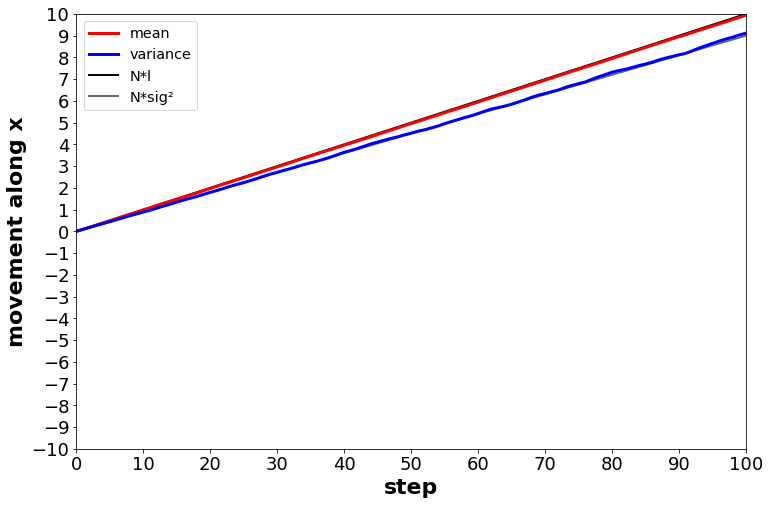

The variance of the squared error of the mean is    : 0.00102
The variance of the squared error of the variance is: 0.00348


In [64]:
# Plot the results
plt.figure(figsize=(12,8))
plt.plot(Xcoord,avgX,  color='red',linewidth=3, zorder=1, label='mean') # average path
plt.plot(Xcoord,sigX**2,  color='blue',linewidth=3, zorder=1, label='variance') # variance path
plt.plot(Xcoord, l*Xcoord,  color='black',linewidth=2, zorder=0, label='N*l') # theoretical average path
plt.plot(Xcoord,Xcoord*(sig**2),  color='dimgrey',linewidth=2, zorder=0, label='N*sig²') # theoretical variance path
plt.legend(fontsize='x-large') #draw/add the legend
Yrange=10
plt.axis([0,N,-5,5])
Xlst=np.linspace(0,N,int(N/10)+1)
Ylst=np.linspace(-Yrange,Yrange,int(2*Yrange)+1)
plt.xticks(Xlst,fontsize=18)
plt.yticks(Ylst,fontsize=18)
plt.xlabel("step",fontsize=22,fontweight="bold")
plt.ylabel("movement along x",fontsize=22,fontweight="bold")
plt.show()

# Numerical quality
sqDiffMean=(avgX-l*Xcoord)**2
varMean=np.std(sqDiffMean)
sqDiffVar=(sigX**2-Xcoord*(sig**2))**2
varVar=np.std(sqDiffVar)
print("The variance of the squared error of the mean is    : %.5f" % varMean)
print("The variance of the squared error of the variance is: %.5f" % varVar)


## Exercise ##
As you may have noticed, starting from an ensemble of $N=10$ particles, the calculated mean and variance can differ significantly from their theoretical values. This is a typical signature of *unconverged results*, and an important aspect of statistical simulations one always needs to be aware of. 

1. Modify the simulations above to investigate the convergence as function of the ensemble size.
2. With a sufficiently converged setup, investigate the impact on your results of varying $l$ and $\sigma$
